 # Analysis of the incidence of chickenpox

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Download the csv file for the incidence of chickenpox from "www.sentiweb.fr". Find the download url in the browser download history.

In [26]:
data_url = "https://www.sentiweb.fr/datasets/all/inc-7-PAY.csv"

The first line of this CSV file is a comment. Ignore it with skiprows=1.

In [27]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202524          7   4234     1856    6612       6           2   
1     202523          7   4858     2623    7093       7           4   
2     202522          7   6837     3940    9734      10           6   
3     202521          7   4693     2653    6733       7           4   
4     202520          7   3083     1535    4631       5           3   
5     202519          7   5084     1997    8171       8           3   
6     202518          7   5003     2718    7288       7           4   
7     202517          7   6246     3424    9068       9           5   
8     202516          7   6151     3193    9109       9           5   
9     202515          7   5557     3262    7852       8           5   
10    202514          7   4984     2858    7110       7           4   
11    202513          7   5964     3608    8320       9           5   
12    202512          7   3855     1995    5715       6           3   
13    202511          7   5878     2747    9009       9           4   
14    202510          7   2921     1421    4421       4           2   
15    202509          7   3381     1468    5294       5           2   
16    202508          7   2835     1286    4384       4           2   
17    202507          7   4502     2382    6622       7           4   
18    202506          7   3455     1958    4952       5           3   
19    202505          7   2087     1056    3118       3           1   
20    202504          7   6895     4466    9324      10           6   
21    202503          7   2462     1161    3763       4           2   
22    202502          7   5966     2757    9175       9           4   
23    202501          7   6059     2451    9667       9           4   
24    202452          7   4356     1776    6936       7           3   
25    202451          7   4670     2239    7101       7           3   
26    202450          7   7363     4438   10288      11           7   
27    202449          7   6077     3631    8523       9           5   
28    202448          7   4189     1454    6924       6           2   
29    202447          7   1931      726    3136       3           1   
...      ...        ...    ...      ...     ...     ...         ...   
1772  199126          7  17608    11304   23912      31          20   
1773  199125          7  16169    10700   21638      28          18   
1774  199124          7  16171    10071   22271      28          17   
1775  199123          7  11947     7671   16223      21          13   
1776  199122          7  15452     9953   20951      27          17   
1777  199121          7  14903     8975   20831      26          16   
1778  199120          7  19053    12742   25364      34          23   
1779  199119          7  16739    11246   22232      29          19   
1780  199118          7  21385    13882   28888      38          25   
1781  199117          7  13462     8877   18047      24          16   
1782  199116          7  14857    10068   19646      26          18   
1783  199115          7  13975     9781   18169      25          18   
1784  199114          7  12265     7684   16846      22          14   
1785  199113          7   9567     6041   13093      17          11   
1786  199112          7  10864     7331   14397      19          13   
1787  199111          7  15574    11184   19964      27          19   
1788  199110          7  16643    11372   21914      29          20   
1789  199109          7  13741     8780   18702      24          15   
1790  199108          7  13289     8813   17765      23          15   
1791  199107          7  12337     8077   16597      22          15   
1792  199106          7  10877     7013   14741      19          12   
1793  199105          7  10442     6544   14340      18          11   
1794  199104          7   7913     4563   11263      14           8   
1795  199103          7  15387    10484   20290      27          18   
1796  199102          7  16277  

Check if there is any missing data points:

In [28]:
 raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

There is no missing data points in this data file, because the above command output nothing.

Note that Pandas does not know about week numbers. It needs to be given the dates of the beginning and end of the week. We use the library isoweek for that. We write a Python function for doing it. Then we apply it to all points in our dataset. The results include a new column 'period'.

In [29]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

raw_data['period'] = [convert_week(yw) for yw in raw_data['week']]
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202524          7   4234     1856    6612       6           2   
1     202523          7   4858     2623    7093       7           4   
2     202522          7   6837     3940    9734      10           6   
3     202521          7   4693     2653    6733       7           4   
4     202520          7   3083     1535    4631       5           3   
5     202519          7   5084     1997    8171       8           3   
6     202518          7   5003     2718    7288       7           4   
7     202517          7   6246     3424    9068       9           5   
8     202516          7   6151     3193    9109       9           5   
9     202515          7   5557     3262    7852       8           5   
10    202514          7   4984     2858    7110       7           4   
11    202513          7   5964     3608    8320       9           5   
12    202512          7   3855     1995    5715       6           3   
13    202511          7   5878     2747    9009       9           4   
14    202510          7   2921     1421    4421       4           2   
15    202509          7   3381     1468    5294       5           2   
16    202508          7   2835     1286    4384       4           2   
17    202507          7   4502     2382    6622       7           4   
18    202506          7   3455     1958    4952       5           3   
19    202505          7   2087     1056    3118       3           1   
20    202504          7   6895     4466    9324      10           6   
21    202503          7   2462     1161    3763       4           2   
22    202502          7   5966     2757    9175       9           4   
23    202501          7   6059     2451    9667       9           4   
24    202452          7   4356     1776    6936       7           3   
25    202451          7   4670     2239    7101       7           3   
26    202450          7   7363     4438   10288      11           7   
27    202449          7   6077     3631    8523       9           5   
28    202448          7   4189     1454    6924       6           2   
29    202447          7   1931      726    3136       3           1   
...      ...        ...    ...      ...     ...     ...         ...   
1772  199126          7  17608    11304   23912      31          20   
1773  199125          7  16169    10700   21638      28          18   
1774  199124          7  16171    10071   22271      28          17   
1775  199123          7  11947     7671   16223      21          13   
1776  199122          7  15452     9953   20951      27          17   
1777  199121          7  14903     8975   20831      26          16   
1778  199120          7  19053    12742   25364      34          23   
1779  199119          7  16739    11246   22232      29          19   
1780  199118          7  21385    13882   28888      38          25   
1781  199117          7  13462     8877   18047      24          16   
1782  199116          7  14857    10068   19646      26          18   
1783  199115          7  13975     9781   18169      25          18   
1784  199114          7  12265     7684   16846      22          14   
1785  199113          7   9567     6041   13093      17          11   
1786  199112          7  10864     7331   14397      19          13   
1787  199111          7  15574    11184   19964      27          19   
1788  199110          7  16643    11372   21914      29          20   
1789  199109          7  13741     8780   18702      24          15   
1790  199108          7  13289     8813   17765      23          15   
1791  199107          7  12337     8077   16597      22          15   
1792  199106          7  10877     7013   14741      19          12   
1793  199105          7  10442     6544   14340      18          11   
1794  199104          7   7913     4563   11263      14           8   
1795  199103          7  15387    10484   20290      27          18   
1796  199102          7  16277  

Make the column "period" to be the index (the first column), and sort the data chronologically:

In [30]:
sorted_data = raw_data.set_index('period').sort_index()
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2024-11-18/2024-11-24  202447          7   1931      726    3136       3   
2024-11-25/2024-12-01  202448          7   4189     1454    6924       6   
2024-12-02/2024-12-08  202449          7   6077     3631    8523       9   
2024-12-09/2024-12-15  202450          7   7363     4438   10288      11   
2024-12-16/2024-12-22  202451          7   4670     2239    7101       7   
2024-12-23/2024-12-29  202452          7   4356     1776    6936       7   
2024-12-30/2025-01-05  202501          7   6059     2451    9667       9   
2025-01-06/2025-01-12  202502          7   5966     2757    9175       9   
2025-01-13/2025-01-19  202503          7   2462     1161    3763       4   
2025-01-20/2025-01-26  202504          7   6895     4466    9324      10   
2025-01-27/2025-02-02  202505          7   2087     1056    3118       3   
2025-02-03/2025-02-09  202506          7   3455     1958    4952       5   
2025-02-10/2025-02-16  202507          7   4502     2382    6622       7   
2025-02-17/2025-02-23  202508          7   2835     1286    4384       4   
2025-02-24/2025-03-02  202509          7   3381     1468    5294       5   
2025-03-03/2025-03-09  202510          7   2921     1421    4421       4   
2025-03-10/2025-03-16  202511          7   5878     2747    9009       9   
2025-03-17/2025-03-23  202512          7   3855     1995    5715       6   
2025-03-24/2025-03-30  202513          7   5964     3608    8320       9   
2025-03-31/2025-04-06  202514          7   4984     2858    7110       7 

Check the consistency of the data. Between the end of a period and the beginning of the next one, the difference should be zero, or very small. We tolerate an error of 1s:

In [31]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)
    else:
        pass

Nothing is output, which means the consistency of the data is fine.

Now we draw the data:

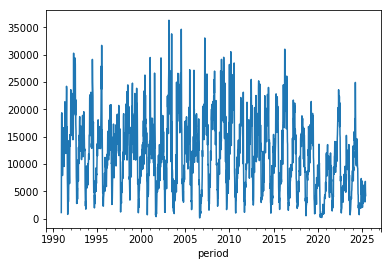

In [32]:
sorted_data['inc'].plot()

Now we draw the data only using the last 200 data points:

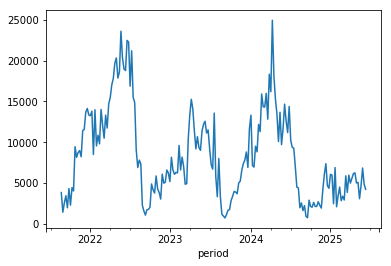

In [33]:
sorted_data['inc'][-200:].plot()

# Study of the annual incidence

The exercise requires to choose September 1st as the beginning of each annual period.

In [34]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]
first_september_week

[Period('1991-08-26/1991-09-01', 'W-SUN'),
 Period('1992-08-31/1992-09-06', 'W-SUN'),
 Period('1993-08-30/1993-09-05', 'W-SUN'),
 Period('1994-08-29/1994-09-04', 'W-SUN'),
 Period('1995-08-28/1995-09-03', 'W-SUN'),
 Period('1996-08-26/1996-09-01', 'W-SUN'),
 Period('1997-09-01/1997-09-07', 'W-SUN'),
 Period('1998-08-31/1998-09-06', 'W-SUN'),
 Period('1999-08-30/1999-09-05', 'W-SUN'),
 Period('2000-08-28/2000-09-03', 'W-SUN'),
 Period('2001-08-27/2001-09-02', 'W-SUN'),
 Period('2002-08-26/2002-09-01', 'W-SUN'),
 Period('2003-09-01/2003-09-07', 'W-SUN'),
 Period('2004-08-30/2004-09-05', 'W-SUN'),
 Period('2005-08-29/2005-09-04', 'W-SUN'),
 Period('2006-08-28/2006-09-03', 'W-SUN'),
 Period('2007-08-27/2007-09-02', 'W-SUN'),
 Period('2008-09-01/2008-09-07', 'W-SUN'),
 Period('2009-08-31/2009-09-06', 'W-SUN'),
 Period('2010-08-30/2010-09-05', 'W-SUN'),
 Period('2011-08-29/2011-09-04', 'W-SUN'),
 Period('2012-08-27/2012-09-02', 'W-SUN'),
 Period('2013-08-26/2013-09-01', 'W-SUN'),
 Period('20

Starting from this list of weeks that contain September 1st, we obtain intervals of approximately one year as the periods between two adjacent weeks in this list. We compute the sums of weekly incidences for all these periods. We also check that our periods contain between 51 and 52 weeks, as a safeguard against potential mistakes in our code.

In [35]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Then we draw the annual incidences:

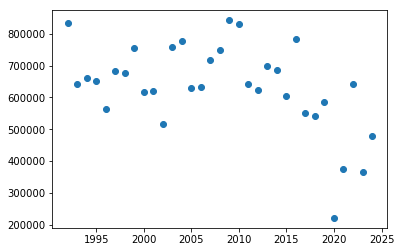

In [36]:
 yearly_incidence.plot(style='o')

Then we ouput the data:

In [37]:
yearly_incidence.sort_values()

2020    221186
2023    366227
2021    376290
2024    479258
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2022    641397
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Find the year with the strongest epidemic and the year with the weakest epidemic from the above data.

Then we draw a histogram:

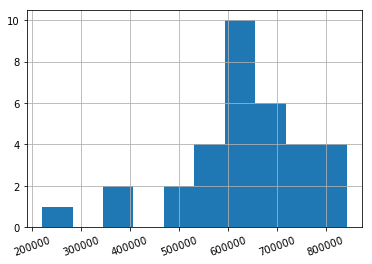

In [38]:
yearly_incidence.hist(xrot=20)